## World Happiness Report (2015 - 2021)

The World Happiness Report is an annual report released by the UN using data collected from the Gallup World Poll. The Report is a survey of the overall state of global happiness. Respondents are asked to imagine a ladder on a scale of 1 (worst life imaginable) to 10 (best possible life). This concept is known as a Cantril Ladder.

The current six variables estimate the extent to which they contribute to overall happiness:
* economic production 
* social support 
* life expectancy
* freedom
* absence of corruption
* generosity  

These factors do not directly contribute to the Happiness Score, however they can help to explain differences between countries and why some rank higher than others.

* What trends may we discern; does worldwide happiness increase or decrease.
* What factors contribute most to world happiness?
* Which Regions are the "most happy" (Highest Score) ?
* Using Income Group classifications, which country / income group has the highest ladder score?
* What countries have the highest and lowest ladder scores?
* Which countries have a ladder score equal to or higher than United States?

We'll be using a dataset that outlines development indicators of all countries. From this dataset we are interested in the income group that a particular country has been assigned by the World Bank. Gross national income per capita is the criteria for assignment of income groups. 
With these income classifications we can answer questions such as: of which income group has the highest/lowest ladder score.
The World Bank assigns each country one of four income groups:
* Low income
* Lower-middle income
* Upper-middle income
* High income

The world happiness report website includes extra data related to COVID-19 mortality for year 2020.
*https://worldhappiness.report/ed/2021/*

This country Population dataset found on kaggle.com includes statistics concerning population change, population density, median age and other variables that may be used to show any possible correlations between happiness score and population stats.
*https://www.kaggle.com/tanuprabhu/population-by-country-2020*


### Method
* Load datasets 
* Clean dataframes, including standardizing any columns if needed
* Concatenate/merge datasets 
* Correct any remaining inconsistencies/errors
* Perform analysis and visualization

## Part 1
### Data Importing and Cleaning

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
%matplotlib inline

In [2]:
# Load-in datasets
report = pd.read_excel("Panel Data.xls")
mortalitly = pd.read_excel("Mortality.xlsx")
report_2021 = pd.read_excel("DataForFigure2.1WHR2021C2.xls")

In [3]:
report.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [4]:
# Percentage of missing values 
report.apply(pd.isnull).sum()/report.shape[0] * 100

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  1.847101
Social support                      0.667009
Healthy life expectancy at birth    2.821960
Freedom to make life choices        1.641868
Generosity                          4.566444
Perceptions of corruption           5.643920
Positive affect                     1.128784
Negative affect                     0.820934
dtype: float64

In [5]:
report[report.isnull().any(axis=1)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.463567,9.286936,NaN,64.500000,0.592696,-0.205320,0.618038,NaN,NaN
28,Algeria,2014,6.354898,9.335159,0.818189,65.139999,NaN,NaN,NaN,0.625905,0.176866
29,Algeria,2016,5.340854,9.362022,0.748588,65.500000,NaN,NaN,NaN,0.660510,0.377112
66,Australia,2005,7.340688,10.658608,0.967892,71.400002,0.934973,NaN,0.390416,0.842648,0.238012
110,Bahrain,2012,5.027187,10.715547,0.911350,66.860001,0.681823,NaN,0.437915,0.589015,0.380815
...,...,...,...,...,...,...,...,...,...,...,...
1908,Yemen,2007,4.477133,8.214067,0.824969,53.400002,0.672685,0.011009,NaN,0.591898,0.378784
1916,Yemen,2016,3.825631,7.715108,0.775407,55.099998,0.532964,-0.150821,NaN,0.469345,0.227925
1917,Yemen,2017,3.253560,7.578437,0.789555,55.900002,0.595191,-0.146712,NaN,0.455182,0.295064
1918,Yemen,2018,3.057514,NaN,0.789422,56.700001,0.552726,NaN,0.792587,0.461114,0.314870


## Data Cleaning and Transformation

In [6]:
# Year 2021 dataset missing values in percentages
report_2021.apply(pd.isnull).sum()/report.shape[0] * 100

Country name                                  0.0
Regional indicator                            0.0
Ladder score                                  0.0
Standard error of ladder score                0.0
upperwhisker                                  0.0
lowerwhisker                                  0.0
Logged GDP per capita                         0.0
Social support                                0.0
Healthy life expectancy                       0.0
Freedom to make life choices                  0.0
Generosity                                    0.0
Perceptions of corruption                     0.0
Ladder score in Dystopia                      0.0
Explained by: Log GDP per capita              0.0
Explained by: Social support                  0.0
Explained by: Healthy life expectancy         0.0
Explained by: Freedom to make life choices    0.0
Explained by: Generosity                      0.0
Explained by: Perceptions of corruption       0.0
Dystopia + residual                           0.0


In [7]:
report_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [8]:
# Column selection
cols_to_use = [
                "Country name",
                "Regional indicator",
                "Ladder score",
                "Logged GDP per capita",
                "Social support",
                "Healthy life expectancy",
                "Freedom to make life choices",
                "Generosity",
                "Perceptions of corruption"
              ]
# Select only columns listed above
report_2021 = report_2021[cols_to_use]

In [9]:
report_2021

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.5118,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377
145,Botswana,Sub-Saharan Africa,3.4665,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619
146,Rwanda,Sub-Saharan Africa,3.4147,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801
147,Zimbabwe,Sub-Saharan Africa,3.1448,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999


In [10]:
# Constructs new column with appropriate year value
report_2021["year"] = 2021

### Region Assignment

In [11]:
# Region mapping

# Read in year 2021 assigned to a new variable "region_mapper"
# Use Country as index
# Use to_dict() method 
region_mapper = pd.read_excel("DataForFigure2.1WHR2021C2.xls", index_col = "Country name").to_dict()

# Re-assign to only include region
region_mapper = region_mapper["Regional indicator"]

# Create new column "region" by country name to country in "region_mapper"
report["Region"] = report["Country name"].map(region_mapper)

In [12]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
 11  Region                            1886 non-null   object 
dtypes: flo

In [13]:
# Verify Region names
report["Region"].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan, 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [14]:
# Displays country names that do not have a region assignment
report[report["Region"].isnull()]["Country name"].unique()

array(['Angola', 'Belize', 'Bhutan', 'Central African Republic',
       'Congo (Kinshasa)', 'Cuba', 'Djibouti', 'Guyana', 'Oman', 'Qatar',
       'Somalia', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname',
       'Syria', 'Trinidad and Tobago'], dtype=object)

In [15]:
# Dictionary of countries with appropriate regions
regions= {
          "Angola":"Sub-Saharan Africa",
          "Belize":"Latin America and Caribbean",
          "Bhutan":"South Asia",
          "Central African Republic":"Sub-Saharan Africa",
          "Congo (Kinshasa)":"Sub-Saharan Africa",
          "Cuba":"Latin America and Caribbean",
          "Djibouti":"Middle East and North Africa",
          "Guyana":"Latin America and Caribbean",
          "Oman":"Middle East and North Africa",
          "Qatar":"Middle East and North Africa",
          "Somalia":"Middle East and North Africa",
          "Somaliland region":"Middle East and North Africa",
          "South Sudan":"Sub-Saharan Africa",
          "Sudan":"Middle East and North Africa",
          "Suriname":"Latin America and Caribbean",
          "Syria":"Middle East and North Africa",
          "Trinidad and Tobago":"Latin America and Caribbean"
          }

# Fill in missing region names
report["Region"] = report["Region"].fillna(report["Country name"].apply(lambda x: regions.get(x))) # Apply lambda function to map region to country

In [16]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
 11  Region                            1949 non-null   object 
dtypes: flo

### Column Renaming and DataFrame Concatenation

In [17]:
# Column names
print("Main dataframe columns")
print(report.columns)
print("\n")
print("Year 2021 columns")
print(report_2021.columns)

Main dataframe columns
Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Region'],
      dtype='object')


Year 2021 columns
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')


In [18]:
# Map new column names report 2021
new_cols_2021 = {
            "Regional indicator":"Region",
            "Healthy life expectancy":"Life Expectancy",
            "Logged GDP per capita":"Log GDP per capita",
            "Country name":"Country",
            "year":"Year",
            "Freedom to make life choices":"Freedom",
            "Ladder score":"Ladder Score"
           }
            
# Map new column names in main report
new_cols = {
            "Country name":"Country",
            "year":"Year",
            "Life Ladder":"Ladder Score",
            "Healthy life expectancy at birth":"Life Expectancy",
            "Freedom to make life choices":"Freedom"
            }

# Renames and reassigns new columns back to appropriate dataframes
report = report.rename(columns=new_cols)
report_2021 = report_2021.rename(columns=new_cols_2021)

# Concatenate both dataframes
# New dataframe "combined_report" contains appropriate column names from prior column renaming
combined_report = pd.concat([report, report_2021],ignore_index=True)

In [19]:
combined_report

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,South Asia
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,South Asia
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,South Asia
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,South Asia
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,South Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
2093,Lesotho,2021,3.511800,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,NaN,NaN,Sub-Saharan Africa
2094,Botswana,2021,3.466500,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,NaN,NaN,Sub-Saharan Africa
2095,Rwanda,2021,3.414700,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,NaN,NaN,Sub-Saharan Africa
2096,Zimbabwe,2021,3.144800,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999,NaN,NaN,Sub-Saharan Africa


In [20]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2062 non-null   float64
 4   Social support             2085 non-null   float64
 5   Life Expectancy            2043 non-null   float64
 6   Freedom                    2066 non-null   float64
 7   Generosity                 2009 non-null   float64
 8   Perceptions of corruption  1988 non-null   float64
 9   Positive affect            1927 non-null   float64
 10  Negative affect            1933 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


### Missing Values

In [21]:
combined_report[combined_report["Log GDP per capita"].isnull()]

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
423,Cuba,2006,5.417869,NaN,0.969595,68.440002,0.281458,NaN,NaN,0.646712,0.276602,Latin America and Caribbean
436,Cyprus,2020,6.259810,NaN,0.805559,74.099998,0.762782,NaN,0.816232,0.758863,0.283522,Western Europe
709,Hong Kong S.A.R. of China,2020,5.295341,NaN,0.812943,NaN,0.705452,NaN,0.380351,0.608647,0.210314,East Asia
771,Iran,2018,4.278118,NaN,0.673765,66.000000,0.603320,NaN,0.703440,0.553197,0.493149,Middle East and North Africa
772,Iran,2019,5.006146,NaN,0.698293,66.300003,0.623282,NaN,0.728307,0.600486,0.448526,Middle East and North Africa
773,Iran,2020,4.864528,NaN,0.757219,66.599998,0.599594,NaN,0.709902,0.582421,0.470245,Middle East and North Africa
918,Kosovo,2020,6.294414,NaN,0.792374,NaN,0.879838,NaN,0.909894,0.726240,0.201458,Central and Eastern Europe
1087,Malta,2020,6.156823,NaN,0.937920,72.199997,0.930600,NaN,0.674626,0.601496,0.410913,Western Europe
1280,North Cyprus,2012,5.463305,NaN,0.871150,NaN,0.692568,NaN,0.854730,0.709236,0.405435,Western Europe
1281,North Cyprus,2013,5.566803,NaN,0.869274,NaN,0.775383,NaN,0.715356,0.621554,0.442972,Western Europe


In [22]:
# Each country with accompanying average Log GDP per capita; grouped by country
# Constructs dictionary of these key-value pairs 
country_dict = combined_report.groupby("Country").mean().to_dict()

In [23]:
# Select only values belonging to Log GDP per capita
# Re-assign to new variable
log_gdp = country_dict["Log GDP per capita"]

In [24]:
# Fill missing entries in Log GDP per capita with dictionary constructed above
combined_report["Log GDP per capita"] = combined_report["Log GDP per capita"].fillna(combined_report["Country"].map(log_gdp))

In [25]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2086 non-null   float64
 4   Social support             2085 non-null   float64
 5   Life Expectancy            2043 non-null   float64
 6   Freedom                    2066 non-null   float64
 7   Generosity                 2009 non-null   float64
 8   Perceptions of corruption  1988 non-null   float64
 9   Positive affect            1927 non-null   float64
 10  Negative affect            1933 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


We still have a few missing entries in `Log GDP per capita`, let's see which ones they are and what we can do about them.

In [26]:
combined_report[combined_report["Log GDP per capita"].isnull()]

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
423,Cuba,2006,5.417869,NaN,0.969595,68.440002,0.281458,NaN,NaN,0.646712,0.276602,Latin America and Caribbean
1559,Somalia,2014,5.528273,NaN,0.610836,49.599998,0.873879,NaN,0.456470,0.834454,0.207215,Middle East and North Africa
1560,Somalia,2015,5.353645,NaN,0.599281,50.099998,0.967869,NaN,0.410236,0.900668,0.186736,Middle East and North Africa
1561,Somalia,2016,4.667941,NaN,0.594417,50.000000,0.917323,NaN,0.440802,0.891423,0.193282,Middle East and North Africa
1562,Somaliland region,2009,4.991400,NaN,0.879567,NaN,0.746304,NaN,0.513372,0.818879,0.112012,Middle East and North Africa
1563,Somaliland region,2010,4.657363,NaN,0.829005,NaN,0.820182,NaN,0.471094,0.769375,0.083426,Middle East and North Africa
1564,Somaliland region,2011,4.930572,NaN,0.787962,NaN,0.858104,NaN,0.357341,0.748686,0.122244,Middle East and North Africa
1565,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.735189,0.152428,Middle East and North Africa
1596,South Sudan,2014,3.831992,NaN,0.545118,49.840000,0.567259,NaN,0.741541,0.614024,0.428320,Sub-Saharan Africa
1597,South Sudan,2015,4.070771,NaN,0.584781,50.200001,0.511631,NaN,0.709606,0.586278,0.449795,Sub-Saharan Africa


In [27]:
# Verify any additional country information of Log GDP per capita
countries = [
                "Cuba",
                "Somalia",
                "Somaliland region",
                "South Sudan"
            ]

# Filter only rows with matching criteria listed above
combined_report[combined_report["Country"].isin(countries)]

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
423,Cuba,2006,5.417869,NaN,0.969595,68.440002,0.281458,NaN,NaN,0.646712,0.276602,Latin America and Caribbean
1559,Somalia,2014,5.528273,NaN,0.610836,49.599998,0.873879,NaN,0.456470,0.834454,0.207215,Middle East and North Africa
1560,Somalia,2015,5.353645,NaN,0.599281,50.099998,0.967869,NaN,0.410236,0.900668,0.186736,Middle East and North Africa
1561,Somalia,2016,4.667941,NaN,0.594417,50.000000,0.917323,NaN,0.440802,0.891423,0.193282,Middle East and North Africa
1562,Somaliland region,2009,4.991400,NaN,0.879567,NaN,0.746304,NaN,0.513372,0.818879,0.112012,Middle East and North Africa
1563,Somaliland region,2010,4.657363,NaN,0.829005,NaN,0.820182,NaN,0.471094,0.769375,0.083426,Middle East and North Africa
1564,Somaliland region,2011,4.930572,NaN,0.787962,NaN,0.858104,NaN,0.357341,0.748686,0.122244,Middle East and North Africa
1565,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.735189,0.152428,Middle East and North Africa
1596,South Sudan,2014,3.831992,NaN,0.545118,49.840000,0.567259,NaN,0.741541,0.614024,0.428320,Sub-Saharan Africa
1597,South Sudan,2015,4.070771,NaN,0.584781,50.200001,0.511631,NaN,0.709606,0.586278,0.449795,Sub-Saharan Africa


The countries that are missing values in `Log GDP per capita` do not have any other additional information in this dataset to refer to.
Instead we can use the same approach from before when we mapped the average country `Log GDP per capita` to missing values, but this time using `Region` averages.

In [28]:
# Group by Region averages
# Construct dictionary
region_dict = combined_report.groupby("Region").mean().to_dict()

# Select only values belonging to Log GDP per capita
# Re-assign to new variable
region_log_dict = region_dict["Log GDP per capita"]

# Fill missing data with region_log_dict
combined_report["Log GDP per capita"] = combined_report["Log GDP per capita"].fillna(combined_report["Region"].map(region_log_dict))

In [29]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2098 non-null   float64
 4   Social support             2085 non-null   float64
 5   Life Expectancy            2043 non-null   float64
 6   Freedom                    2066 non-null   float64
 7   Generosity                 2009 non-null   float64
 8   Perceptions of corruption  1988 non-null   float64
 9   Positive affect            1927 non-null   float64
 10  Negative affect            1933 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


In [30]:
combined_report[combined_report["Life Expectancy"].isnull()]

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
699,Hong Kong S.A.R. of China,2006,5.511187,10.746425,0.812178,NaN,0.909820,0.155567,0.355985,0.723260,0.235955,East Asia
700,Hong Kong S.A.R. of China,2008,5.137262,10.815545,0.840222,NaN,0.922211,0.296268,0.273945,0.718972,0.236634,East Asia
701,Hong Kong S.A.R. of China,2009,5.397056,10.788494,0.834716,NaN,0.918026,0.307638,0.272125,0.762151,0.210104,East Asia
702,Hong Kong S.A.R. of China,2010,5.642835,10.846634,0.857314,NaN,0.890418,0.331955,0.255775,0.710370,0.183106,East Asia
703,Hong Kong S.A.R. of China,2011,5.474011,10.886932,0.846060,NaN,0.894330,0.234555,0.244887,0.733887,0.195712,East Asia
704,Hong Kong S.A.R. of China,2012,5.483765,10.892753,0.826426,NaN,0.879752,0.222402,0.379783,0.715137,0.183349,East Asia
705,Hong Kong S.A.R. of China,2014,5.458051,10.939503,0.833558,NaN,0.843082,0.223799,0.422960,0.683968,0.242868,East Asia
706,Hong Kong S.A.R. of China,2016,5.498421,10.969857,0.832078,NaN,0.799743,0.100235,0.402813,0.664093,0.213115,East Asia
707,Hong Kong S.A.R. of China,2017,5.362475,10.999584,0.831066,NaN,0.830657,0.140063,0.415810,0.639533,0.200593,East Asia
708,Hong Kong S.A.R. of China,2019,5.659317,11.000313,0.855826,NaN,0.726852,0.067344,0.431974,0.599320,0.357607,East Asia


In [31]:
# Select only values belonging to Life Expectancy
# Re-assign to new variable
region_dict_life = region_dict["Life Expectancy"]

# Fill missing data with region_dict_life
combined_report["Life Expectancy"] = combined_report["Life Expectancy"].fillna(combined_report["Region"].map(region_dict_life))

In [32]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2098 non-null   float64
 4   Social support             2085 non-null   float64
 5   Life Expectancy            2098 non-null   float64
 6   Freedom                    2066 non-null   float64
 7   Generosity                 2009 non-null   float64
 8   Perceptions of corruption  1988 non-null   float64
 9   Positive affect            1927 non-null   float64
 10  Negative affect            1933 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


In [33]:
# Fills in remaining missing values with column averages
combined_report = combined_report.fillna(combined_report.mean(numeric_only=True))

In [34]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2098 non-null   float64
 4   Social support             2098 non-null   float64
 5   Life Expectancy            2098 non-null   float64
 6   Freedom                    2098 non-null   float64
 7   Generosity                 2098 non-null   float64
 8   Perceptions of corruption  2098 non-null   float64
 9   Positive affect            2098 non-null   float64
 10  Negative affect            2098 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


Thus far we have done the following:
* Loaded in the datasets
* Assigned regions to appropriate countries
* Renamed columns
* Concatenated `report` and `report_2021` datasets
* Dealt with missing values

### Income Group
In the introduction we stated that we were going to utilize an additional dataset for our analysis. This data was collected by the World Bank, and it outlines an overall picture of every nation's development.

For this analysis we are only concered with the income classification for each country.
The World Bank has four classifications, however with a preview of the dataset it contains five. 
High income has been split into two categories: 

OECD (Organisation for Economic Co-operation and Development) : Countries that are members of this organization

non-OECD : Countries that are not members of this organization

* High income: OECD
* High income: nonOECD
* Upper middle income
* Lower middle income 
* Low income

In [35]:
# Constructs dictionary from dataset below
# Key:"ShortName", Value:""
income = pd.read_csv("World_dev.csv", index_col = "ShortName").to_dict()

In [36]:
# Takes our dictionary and restricts it to only IncomeGroup values
income_group_dict = income["IncomeGroup"]

# Utilizes constructed dictionary above to map income classifications to each Country
combined_report["Income Group"] = combined_report["Country"].map(income_group_dict)

In [37]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2098 non-null   float64
 4   Social support             2098 non-null   float64
 5   Life Expectancy            2098 non-null   float64
 6   Freedom                    2098 non-null   float64
 7   Generosity                 2098 non-null   float64
 8   Perceptions of corruption  2098 non-null   float64
 9   Positive affect            2098 non-null   float64
 10  Negative affect            2098 non-null   float64
 11  Region                     2098 non-null   object 
 12  Income Group               1936 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage:

In [38]:
# Missing value percentages
combined_report.apply(pd.isnull).sum()/combined_report.shape[0] * 100

Country                      0.00000
Year                         0.00000
Ladder Score                 0.00000
Log GDP per capita           0.00000
Social support               0.00000
Life Expectancy              0.00000
Freedom                      0.00000
Generosity                   0.00000
Perceptions of corruption    0.00000
Positive affect              0.00000
Negative affect              0.00000
Region                       0.00000
Income Group                 7.72164
dtype: float64

In [39]:
# Countries with missing income groups
combined_report[combined_report["Income Group"].isnull()]["Country"].unique()

array(['Congo (Brazzaville)', 'Congo (Kinshasa)', 'Gambia',
       'Hong Kong S.A.R. of China', 'Ivory Coast', 'Kyrgyzstan', 'Laos',
       'North Cyprus', 'North Macedonia', 'Palestinian Territories',
       'Slovakia', 'Somaliland region', 'South Korea', 'Syria',
       'Taiwan Province of China'], dtype=object)

`Income Group` has less than 8% missing values. The reason these countries have missing values is likely due spelling differences and/or alternative country names between the values in `combined_report` and the `World_dev` dataframe.

In [40]:
combined_report["Income Group"].value_counts()

Upper middle income     512
Lower middle income     470
High income: OECD       439
Low income              300
High income: nonOECD    215
Name: Income Group, dtype: int64

High income OECD and High income nonOECD are only different due to some countries not participating in the Organisation for Economic Co-operation and Development.
We'd rather have four unique groups instead of five groups with 1 income group separated into two different values. For this approach we may merge both high income groups.

In [41]:
# Rename High income: OECD abd High income: nonOECD to High income
combined_report["Income Group"] = combined_report["Income Group"].str.replace("High income: OECD", "High income")\
                                                                 .str.replace("High income: nonOECD", "High income")

# Countries with alternative name formats in "World_dev.csv"
# Some countries are not listed in "World_dev.csv", thus will be excluded from mapping
miising_income_dict = {
                        "Hong Kong S.A.R. of China":"High income",
                        "South Korea":"High income",
                        "Syria":"Lower middle income",
                        "Slovakia":"High income"
                      }

# Fills in remaining values in income group                      
combined_report["Income Group"] = combined_report["Income Group"].fillna(combined_report["Country"].map(miising_income_dict))

In [42]:
combined_report["Income Group"].value_counts()

High income            695
Upper middle income    512
Lower middle income    477
Low income             300
Name: Income Group, dtype: int64

In [43]:
combined_report

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region,Income Group
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,South Asia,Low income
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,South Asia,Low income
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,South Asia,Low income
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,South Asia,Low income
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,Lesotho,2021,3.511800,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,0.709998,0.268552,Sub-Saharan Africa,Lower middle income
2094,Botswana,2021,3.466500,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,0.709998,0.268552,Sub-Saharan Africa,Upper middle income
2095,Rwanda,2021,3.414700,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,0.709998,0.268552,Sub-Saharan Africa,Low income
2096,Zimbabwe,2021,3.144800,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999,0.709998,0.268552,Sub-Saharan Africa,Low income


### Additional Variables

In [44]:
# COVID-19 related data
mortalitly.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451401,38.299999,0,1.687503,9.314896,0,0,0.250043,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.219727
1,Egypt,102334403.0,100388073.0,7.456900,25.299999,0,1.626675,9.006860,0,0,0.445924,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016001,29.600000,0,2.336053,9.226011,0,0,0.397255,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.507801,31.100000,0,1.891434,8.956014,0,0,0.106633,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875101,31.900000,0,1.250483,8.896798,0,0,0.650619,45.90,NaN,NaN,NaN,NaN,NaN


In [45]:
# Population statistics
population = pd.read_csv("population_by_country_2020.csv", na_values=["N.A."])
population.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38.0,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28.0,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38.0,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30.0,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23.0,35 %,2.83 %


In [46]:
# COVID-19 variables to use
cols = [
        "Country name",
        "Gini coefficient of income",
        "COVID-19 deaths per 100,000 population in 2020"
        ]

# Columns for merging to main dataframe "combined_report"
add_on = mortalitly[cols].copy()


In [47]:
add_on

,Country name,Gini coefficient of income,"COVID-19 deaths per 100,000 population in 2020"
0,United States,47.51,104.451401
1,Egypt,31.56,7.456900
2,Morocco,39.55,20.016001
3,Lebanon,31.83,21.507801
4,Saudi Arabia,45.90,17.875101
...,...,...,...
161,Yemen,36.71,2.045200
162,Kosovo,29.01,68.916496
163,Somaliland region,NaN,NaN
164,North Cyprus,NaN,NaN


The yearly world happiness report provides an additional six factors that help explain why some countries score higher than others. These six variables are already present in our dataframe. The following columns listed below may show other patterns or correlations that are not present with the current variables.

* `Gini coefficient of income` (measure of the distribution of income across a population; a higher percentage indicates greater inequality)
* `COVID-19 deaths per 100,000 population in 2020`

*https://www.investopedia.com/terms/g/gini-index.asp*

In [48]:
# Merges combined_report dataframe with add_on columns
combined = pd.merge(combined_report,add_on, how="left", left_on = "Country", right_on="Country name").drop(columns="Country name")

In [49]:
combined

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region,Income Group,Gini coefficient of income,"COVID-19 deaths per 100,000 population in 2020"
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,South Asia,Low income,31.0000,5.6283
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,South Asia,Low income,31.0000,5.6283
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,South Asia,Low income,31.0000,5.6283
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,South Asia,Low income,31.0000,5.6283
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,South Asia,Low income,31.0000,5.6283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,Lesotho,2021,3.511800,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,0.709998,0.268552,Sub-Saharan Africa,Lower middle income,54.1800,2.3807
2094,Botswana,2021,3.466500,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,0.709998,0.268552,Sub-Saharan Africa,Upper middle income,53.3300,1.7860
2095,Rwanda,2021,3.414700,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,0.709998,0.268552,Sub-Saharan Africa,Low income,43.7100,0.7103
2096,Zimbabwe,2021,3.144800,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999,0.709998,0.268552,Sub-Saharan Africa,Low income,40.3625,2.4423


In [50]:
# Some country names do not match perfectly
# Renames countries in population dataset for proper merging
population["Country (or dependency)"] = population["Country (or dependency)"].str.replace("Czech Republic (Czechia)","Czech Republic", regex=False)\
                                                                             .str.replace("Hong Kong","Hong Kong S.A.R. of China", regex=False)\
                                                                             .str.replace("Taiwan","Taiwan Province of China", regex=False)

# Merges population stats with main dataframe
combined = pd.merge(combined, population, how="left", left_on = "Country", right_on="Country (or dependency)").drop(columns="Country (or dependency)")

In [51]:
combined.apply(pd.isnull).sum()/combined.shape[0] * 100

Country                                           0.000000
Year                                              0.000000
Ladder Score                                      0.000000
Log GDP per capita                                0.000000
Social support                                    0.000000
Life Expectancy                                   0.000000
Freedom                                           0.000000
Generosity                                        0.000000
Perceptions of corruption                         0.000000
Positive affect                                   0.000000
Negative affect                                   0.000000
Region                                            0.000000
Income Group                                      5.433746
Gini coefficient of income                        0.762631
COVID-19 deaths per 100,000 population in 2020    1.286940
Population (2020)                                 3.574833
Yearly Change                                     3.5748

In [52]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         2098 non-null   object 
 1   Year                                            2098 non-null   int64  
 2   Ladder Score                                    2098 non-null   float64
 3   Log GDP per capita                              2098 non-null   float64
 4   Social support                                  2098 non-null   float64
 5   Life Expectancy                                 2098 non-null   float64
 6   Freedom                                         2098 non-null   float64
 7   Generosity                                      2098 non-null   float64
 8   Perceptions of corruption                       2098 non-null   float64
 9   Positive affect                          

In [53]:
pd.set_option("display.max_columns", None)
combined.head()


,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region,Income Group,Gini coefficient of income,"COVID-19 deaths per 100,000 population in 2020",Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,South Asia,Low income,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,South Asia,Low income,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,South Asia,Low income,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,South Asia,Low income,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,South Asia,Low income,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %


In [54]:
# Change column names, remove "%" and convert to numeric dtypes

combined["Yearly Change"] = combined["Yearly Change"].str.rstrip("%").astype(float)
combined["Urban Pop %"] = combined["Urban Pop %"].str.rstrip("%").astype(float)
combined["World Share"] = combined["World Share"].str.rstrip("%").astype(float)
combined["Fert. Rate"] = combined["Fert. Rate"].astype(float)
combined["Med. Age"] = combined["Med. Age"].astype(float)

cols_rename = {
                "Yearly Change": "Yearly Change %", 
                "World Share":"World Share %",
                "Fert. Rate":"Fertility Rate %",
                "Med. Age": "Median Age",
                "COVID-19 deaths per 100,000 population in 2020":"COVID-19 deaths per 100,000 (2020)"
              }
# Rename columns, and set a new copy
full_report = combined.rename(columns=cols_rename).copy()


Thus far we have done the following:
* Loaded in the datasets
* Assigned regions to appropriate countries
* Concatenated `report`, `report_2021`, `mortality`, `population`, and `income` datasets
* Mapped income groups to appropriate countries
* Fixed some inaccurate/alternate country names
* Converted several variables to numeric data types
* Dealt with missing values
* Renamed columns


## Part 2
### Analysis and Visualization

In [55]:
# Create groups of region, country, and year variables

# Country, region
country_group = full_report.groupby("Country", as_index=False).mean()
region_group = full_report.groupby("Region", as_index=False).mean()

# Yearly mean and median
year_avg = full_report.groupby("Year").mean()
year_median = full_report.groupby("Year").median()

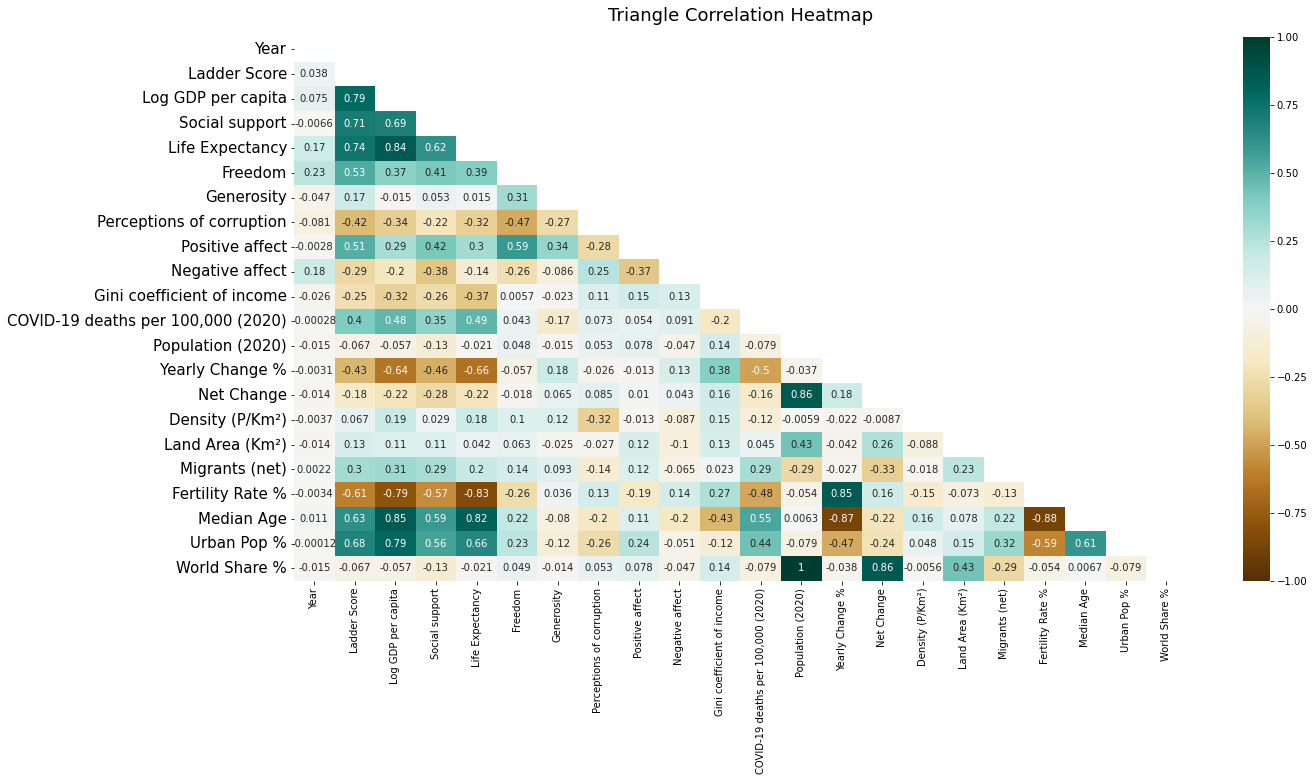

In [56]:
# Triangle Correlation Heatmap
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(full_report.corr(), dtype=bool))

heatmap = sns.heatmap(full_report.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.yticks(size=15)
plt.show()

The six factors that contribute to happiness tend to be positively correlated to happiness, but we must be careful to note that these factors are only a derivative of the ladder score. In the survey conducted respondents were asked questions based on these factors with an answer of 0 or 1 (binary answers), which is how the data was calculated.

We may notice that Log GDP per capita or life expectancy has the strongest positive correlation to ladder score.
Positive or negative affect are an average of three questions pertaining to either variable. These variables relate to day-to-day feelings of postive or negative emotions, and not surprisingly, they do have some correlation to happiness.

A few other variables that may correlate to happiness include: 
* fertility rate % (population growth rate)
* median age
* Life Expectancy
* urban population percentage
* COVID-19 deaths in 2020
* Freedom


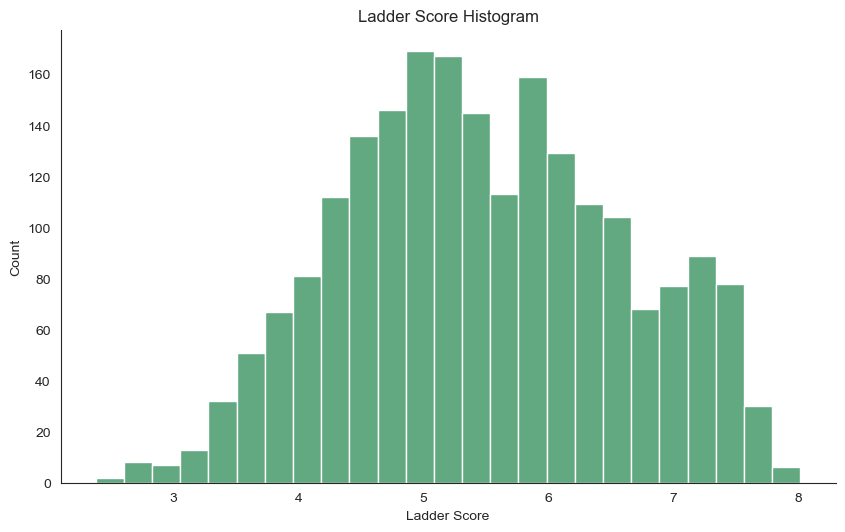

In [57]:
sns.set_style("white")

# Ladder Score distribution
plt.subplots(figsize = (10,6), dpi = 100)
ax = sns.histplot(x="Ladder Score", data=full_report, color="seagreen", bins=25)
sns.despine()
plt.title("Ladder Score Histogram")
plt.show()

In [58]:
full_report["Ladder Score"].describe()

count    2098.000000
mean        5.471403
std         1.112682
min         2.375092
25%         4.652504
50%         5.391887
75%         6.282982
max         8.018934
Name: Ladder Score, dtype: float64

The distibution of ladder scores is fairly normal with a slight skewness to the right. Since the mean and median are close, we should not expect too many outliers in our dataset.


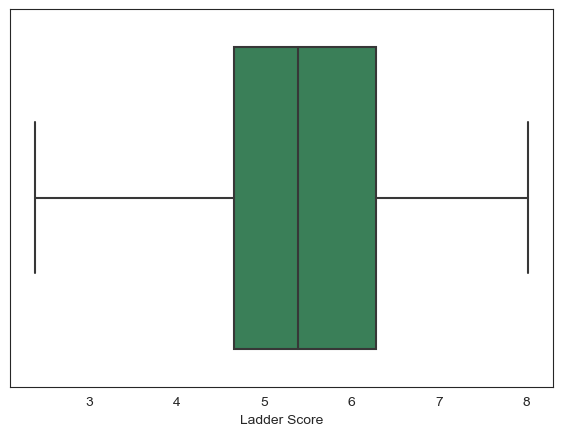

In [59]:
# Check for outliers in ladder score
plt.subplots(figsize = (7,5), dpi = 100)
ax = sns.boxplot(x="Ladder Score", data=full_report, color="seagreen")

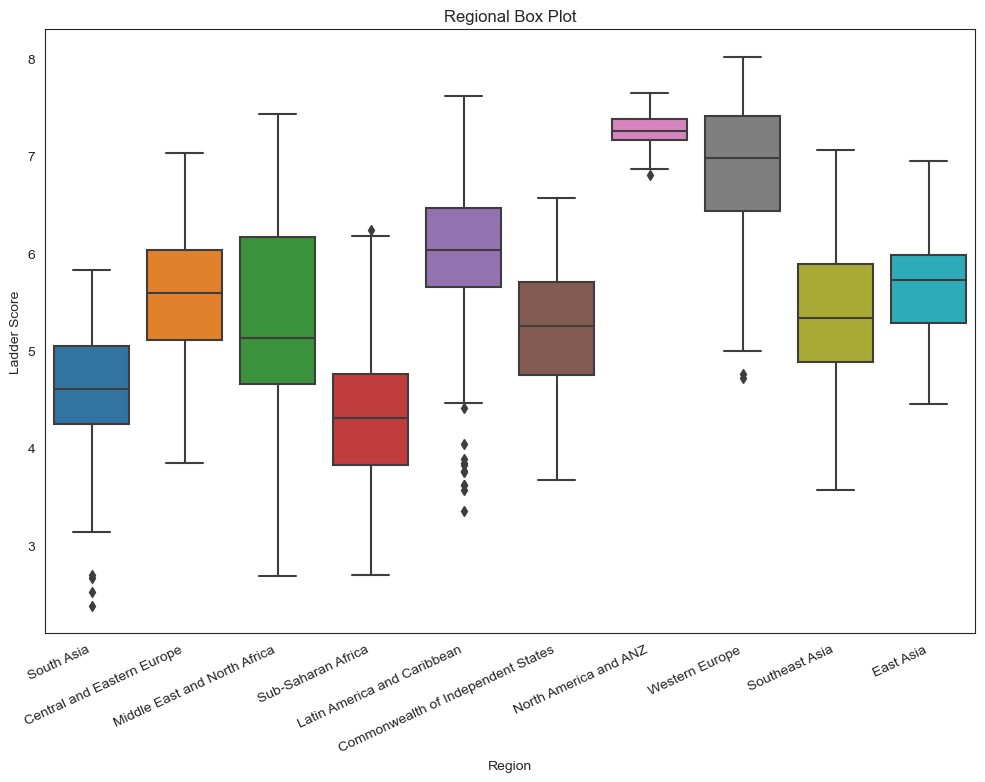

In [60]:
# Regional outliers
plt.subplots(figsize = (12,8), dpi = 100)
ax = sns.boxplot(x="Region", y="Ladder Score", data=full_report, dodge=False)
plt.xticks(ha="right", rotation=25)
plt.title("Regional Box Plot")
plt.show()

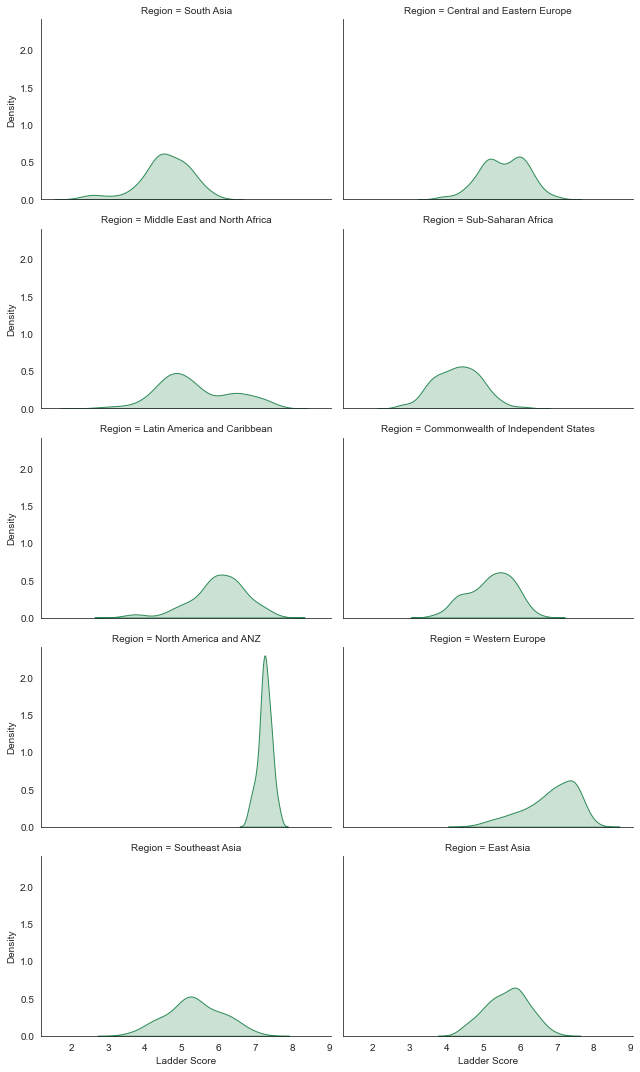

In [61]:
# Regional ladder score density plot
g= sns.FacetGrid(full_report, col="Region", height=3, aspect=1.5, col_wrap=2)
g.map_dataframe(sns.kdeplot, x="Ladder Score", color="seagreen", shade=True)
g.set_xlabels("Ladder Score");

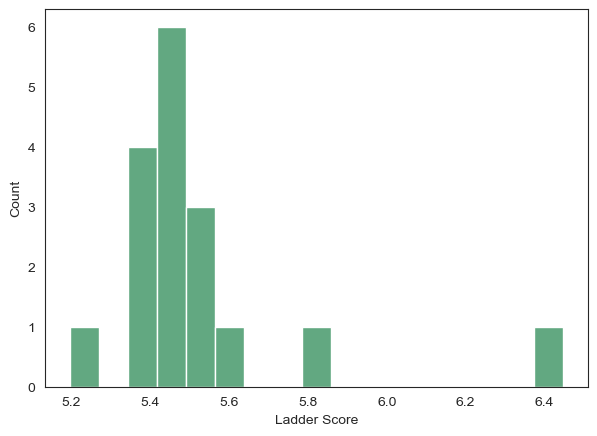

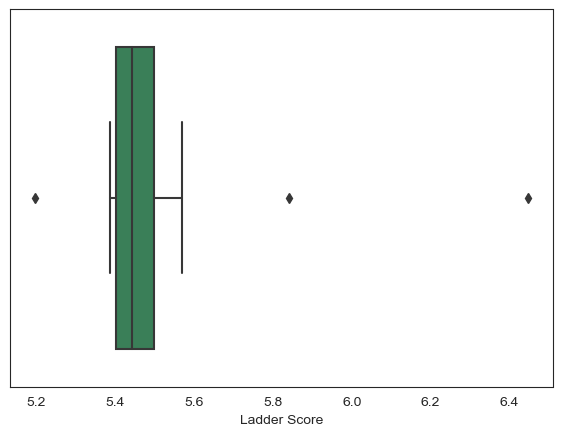

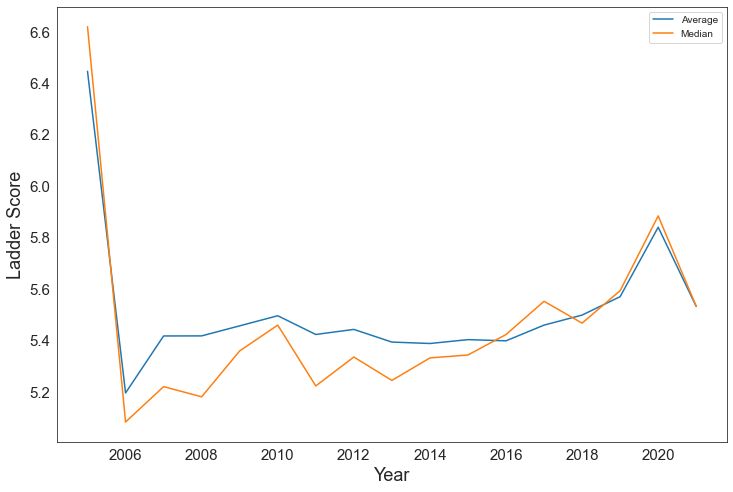

In [62]:
# Histogram early average ladder score 
plt.subplots(figsize = (7,5), dpi = 100)
ax = sns.histplot(x="Ladder Score", data=year_avg, color="seagreen")
plt.show()

# Box plot for outliers
plt.subplots(figsize = (7,5), dpi = 100)
ax = sns.boxplot(x="Ladder Score", data=year_avg, color="seagreen")
plt.show()

# Mean and median year ladder scores
plt.figure(figsize=(12,8))
plt.plot(year_avg.index, year_avg["Ladder Score"], label = "Average")
plt.plot(year_median.index, year_median["Ladder Score"], label = "Median")
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Year", size=18)
plt.ylabel("Ladder Score", size=18)
plt.legend()
plt.show()

We can see a few different outliers for yearly average ladder score. In 2005 and 2020 it was highest at 6.4 and 5.8, and then lowest in 2006 at 5.2. The reason for this may possibly be a result of different countries being included or excluded for particular years, which may have an effect on the distribution of yearly scores.
The median yearly ladder score follows a similar trend as the mean, and world happiness appears to improve around 2016.
Without a larger timeframe it is difficult to prove if world happiness is improving, worsening or simply remaining constant.

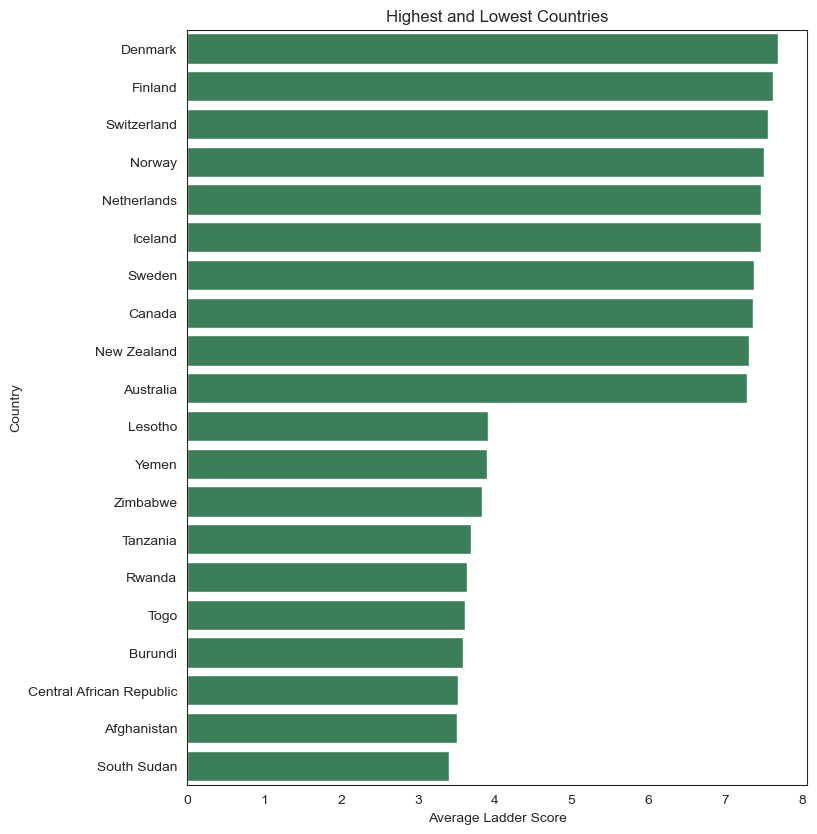

In [148]:
# Highest and lowest ladder scores by country
bottom_10 = country_group.nsmallest(10,"Ladder Score").sort_values(by="Ladder Score", ascending=False)
top_10 = country_group.nlargest(10,"Ladder Score")
high_low = top_10.append(bottom_10, ignore_index=False)

# Plot results
fig, bar = plt.subplots(figsize = (8,10), dpi = 100)
sns.barplot(x="Ladder Score", y="Country", data=high_low, color="seagreen")
plt.title("Highest and Lowest Countries")
plt.xlabel("Average Ladder Score")
plt.show()

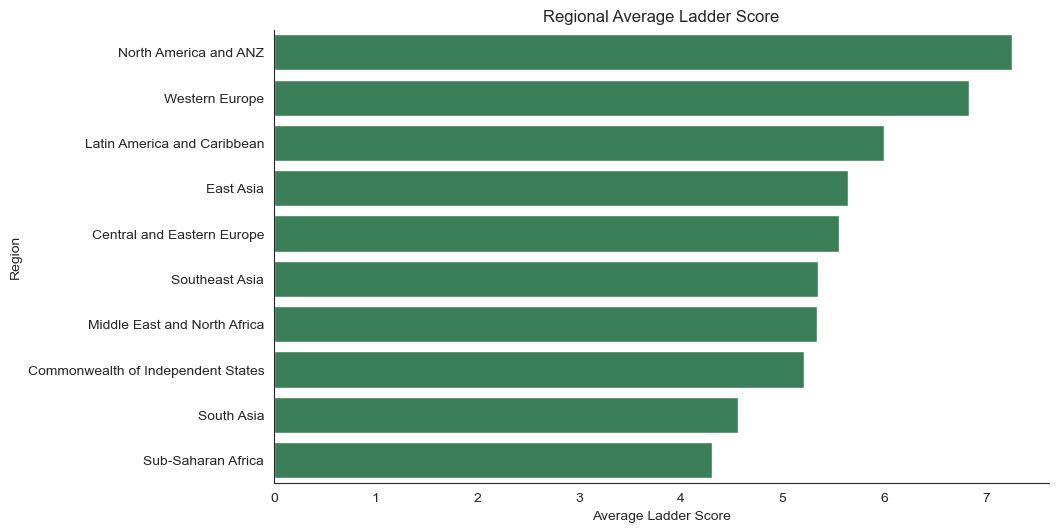

In [64]:
# Regional average ladder Score
fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
sns.barplot(x="Ladder Score", y="Region", data = region_group.sort_values(by="Ladder Score", ascending = False), color="seagreen")
plt.title("Regional Average Ladder Score")
plt.xlabel("Average Ladder Score")
sns.despine();

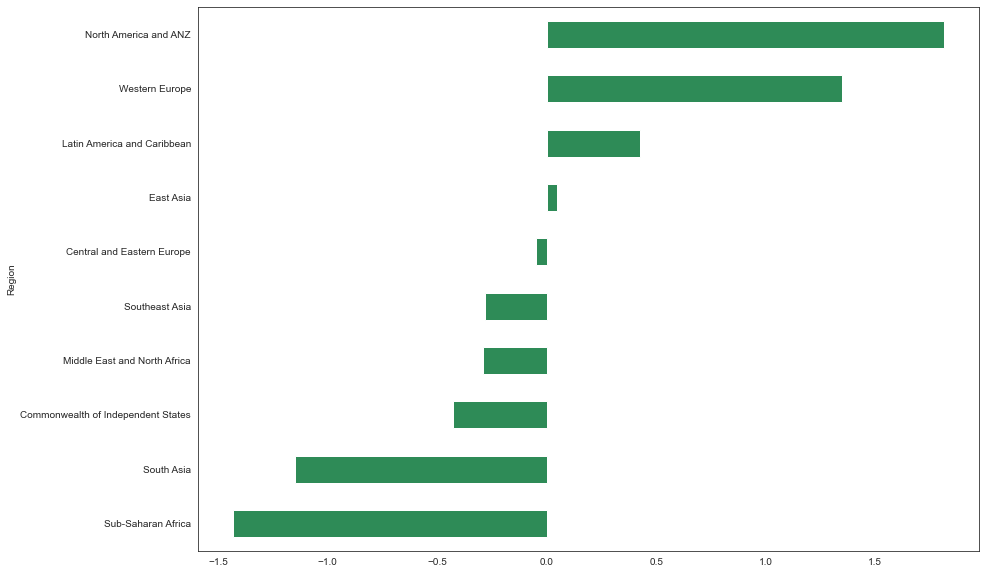

In [65]:
# Regional standard scores
# Lambda function calculates: 
# each region ladder score - dataframe ladder score mean / dataframe standard deviation
region_group.set_index("Region")["Ladder Score"]\
                                                .transform(lambda x: (x- x.mean()) / x.std()).sort_values()\
                                                .plot(kind="barh",figsize=(14,10), color="seagreen");


European countries (particularly Northern European nations) score the highest on overall happiness, whereas the majority of ten lowest happiest countries are in Sub-Saharan Africa. 
Interesting to note that eventhough Western European countries are the "happiest", North America has the highest average ladder score, with Western Europe in second. Western Europe appears to have a more left skewed distribution, there is likely a greater number of Western European countries that have an average ladder score below the median.
North America has a narrower distribution of values that indicates that there are fewer countries present in this region, but their ladder scores are very close to the mean.

Other noteworthy observations:
* The region of the middle east and north africa has the greatest distribution of ladder scores from around 2.5 to 7.5
* At first glance, latin america appears to have the greatest number of outliers, all of them being below the 25% quartile
* East Asia and Central/Eastern Europe have regional ladder scores closest to the average ladder score (they could be considered the "most average" in happiness)

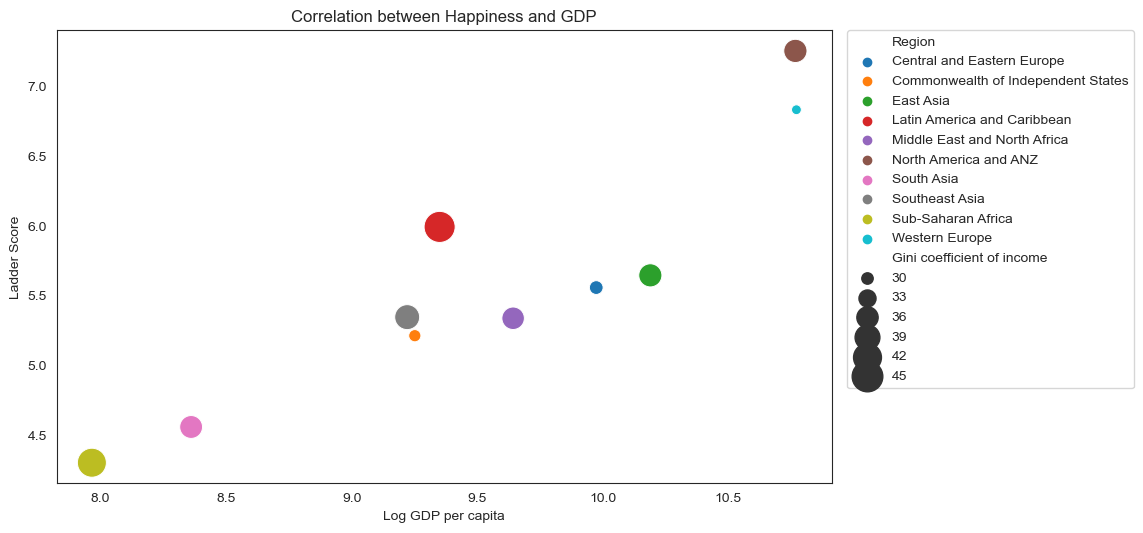

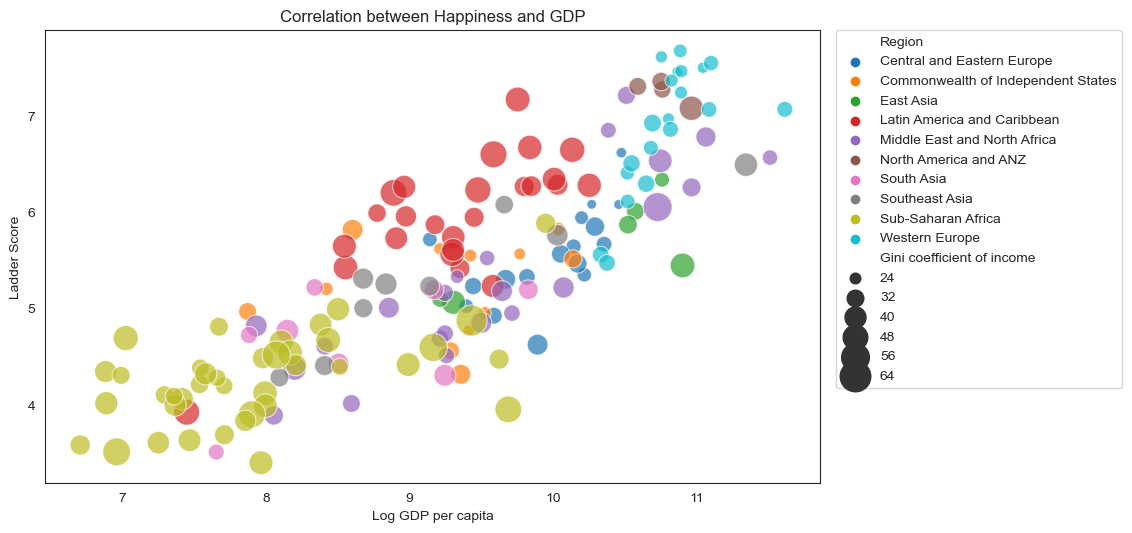

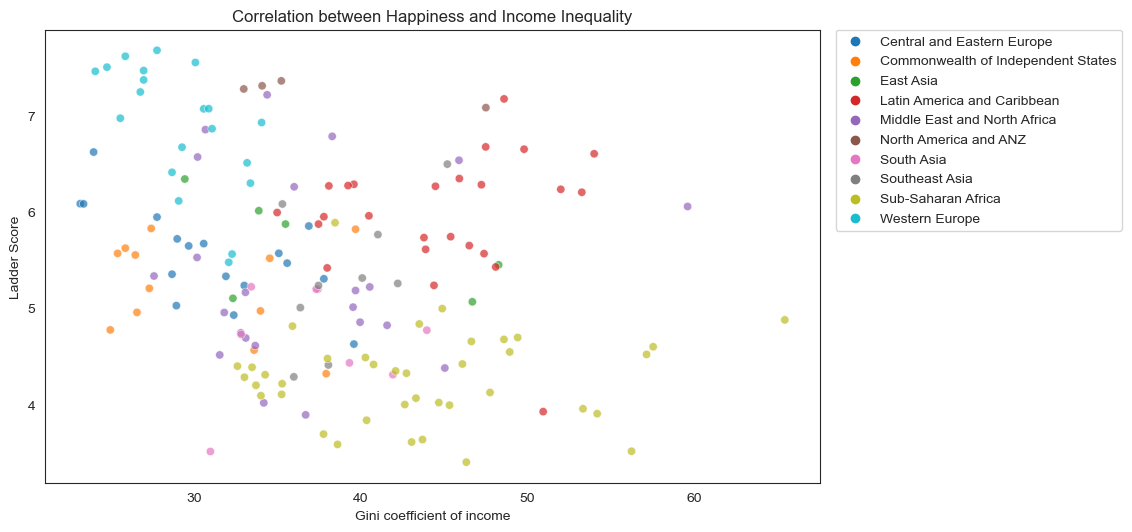

In [66]:
# GDP and ladder score correlation
fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
sns.scatterplot(x="Log GDP per capita", y="Ladder Score", hue="Region", data=region_group, size="Gini coefficient of income", sizes=(50,500))
plt.title("Correlation between Happiness and GDP")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# Multi index dataframe grouped by region and country
country_region = full_report.groupby(["Region","Country"]).mean()

# GDP and ladder score correlation by country and region
fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
sns.scatterplot(x="Log GDP per capita", y="Ladder Score", hue="Region", data=country_region, size="Gini coefficient of income", sizes=(50,500), alpha=0.7)
plt.title("Correlation between Happiness and GDP")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# Income inequality and ladder score correlation
fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
sns.scatterplot(x="Gini coefficient of income", y="Ladder Score", hue="Region", data=country_region, sizes=(50,500), alpha=0.7)
plt.title("Correlation between Happiness and Income Inequality")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


In the first graph we may notice at least 3 different clusters or groups of regions. At the top right corner lies NA/ANZ and Western Europe with the highest average ladder score and highest GDP per capita. 
The center cluster of regions have a more average score and GDP, and in the bottom left include the regions of Sub-Saharan Africa and South Asia. These two regions could be considered to have below average happiness, and their GDP is the lowest compared to other regions.

We may notice that Latin America may score above average on happiness, their income inequality is quite significant. Even North America/ANZ has moderate income inequality compared to Western Europe with significantly lower inequality.

The Middle East and North Africa has a wide distribution of ladder scores and Log GDP. It looks like there are some countries in the Middle East that rank high in happiness with significant income inequality.

Overall, we may notice that income inequality may not have a large impact on a country's happiness compared to other factors. 

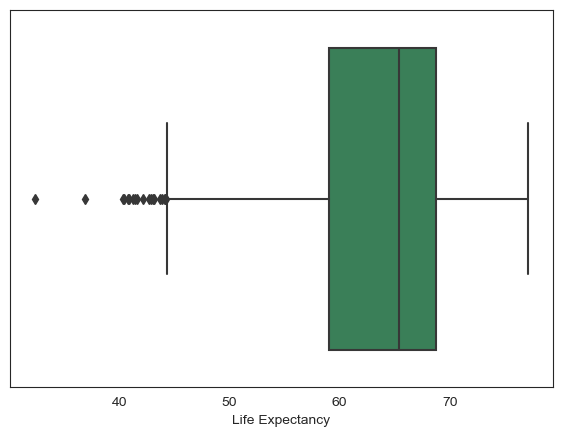

In [84]:

plt.subplots(figsize = (7,5), dpi = 100)
ax = sns.boxplot(x="Life Expectancy", data = full_report, color="seagreen")

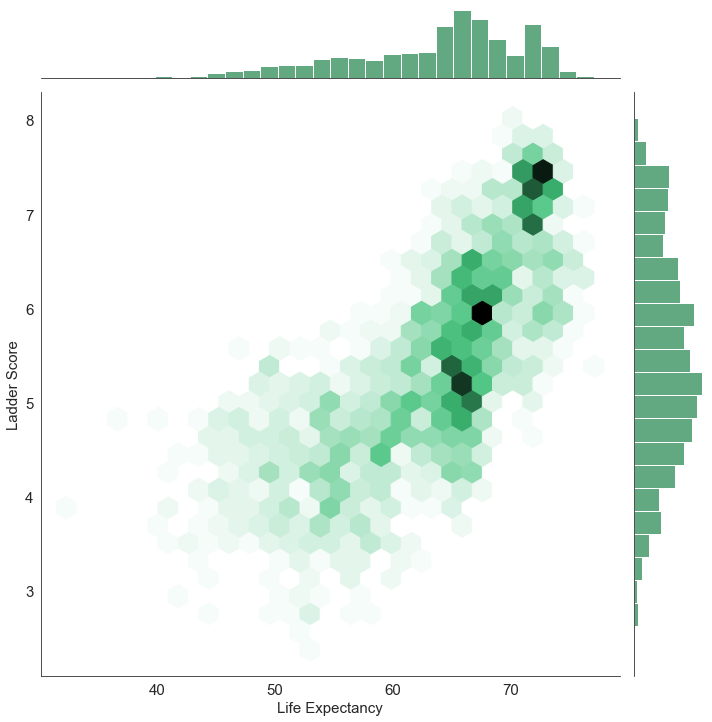

In [68]:
# Happiness and Life Expectancy
sns.jointplot(x="Life Expectancy",y="Ladder Score", data=full_report, kind="hex", height=10, ratio=7, color="seagreen")
plt.xticks(size=15)
plt.xlabel("Life Expectancy" , size=15)
plt.yticks(size=15)
plt.ylabel("Ladder Score", size=15)
plt.show()


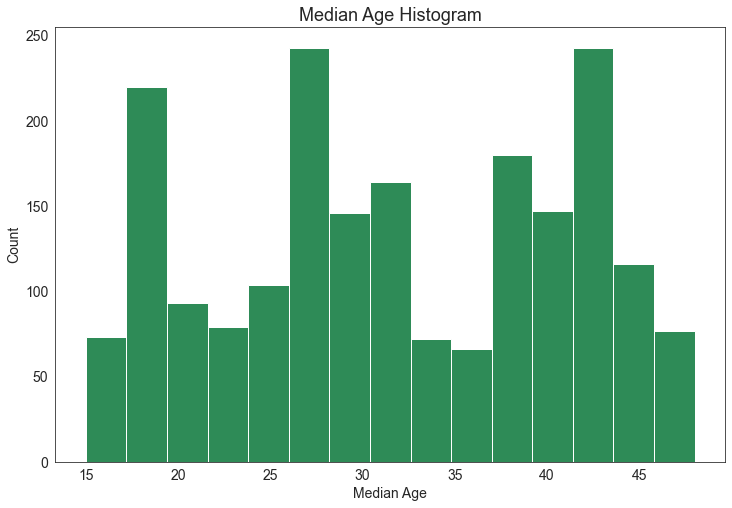

In [86]:
# Median age histogram
plt.figure(figsize=(12,8))
plt.hist(full_report["Median Age"], bins = 15, color="seagreen")
plt.xticks(size=14)
plt.xlabel("Median Age", size = 14)
plt.yticks(size=14)
plt.ylabel("Count", size=14)
plt.title("Median Age Histogram", size = 18)
plt.show()


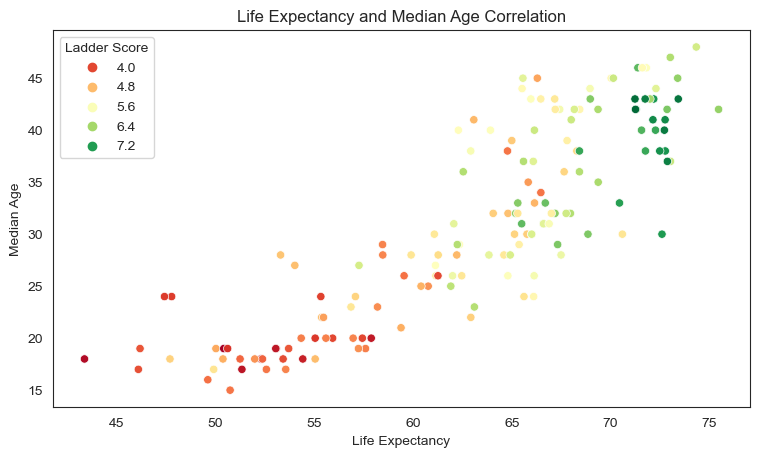

In [82]:
# Correlations between life expectancy and median age
fig, bar = plt.subplots(figsize = (9,5), dpi = 100)
sns.scatterplot(x="Life Expectancy", y="Median Age", hue="Ladder Score", data = country_group, palette="RdYlGn")
plt.title("Life Expectancy and Median Age Correlation")
plt.show()

### Inferences thus far
* `Ladder Score` has a fairly normal distribution of observations
* Western Europe, North America and Australia/NZ have the highest average ladder scores
* Sub-Saharan Africa and South Asia are the "least happiest" among all regions
* Income inequality throughout every region and country varies, and the correlation between it and happiness is rather weak
* Countries and Regions appear to be more affected by Life Expectancy and GDP
* Typically, countries with a higher life expectancy and higher GDP tend to be happier


In [101]:

highest_life_expectancy = np.round(full_report.groupby("Country")["Life Expectancy"].mean().nlargest(15), decimals = 2)
lowest_life_expectancy = np.round(full_report.groupby("Country")["Life Expectancy"].mean().nsmallest(15), decimals = 2).sort_values(ascending = False)

In [104]:
life_expectancy_list = highest_life_expectancy.append(lowest_life_expectancy, ignore_index=False)

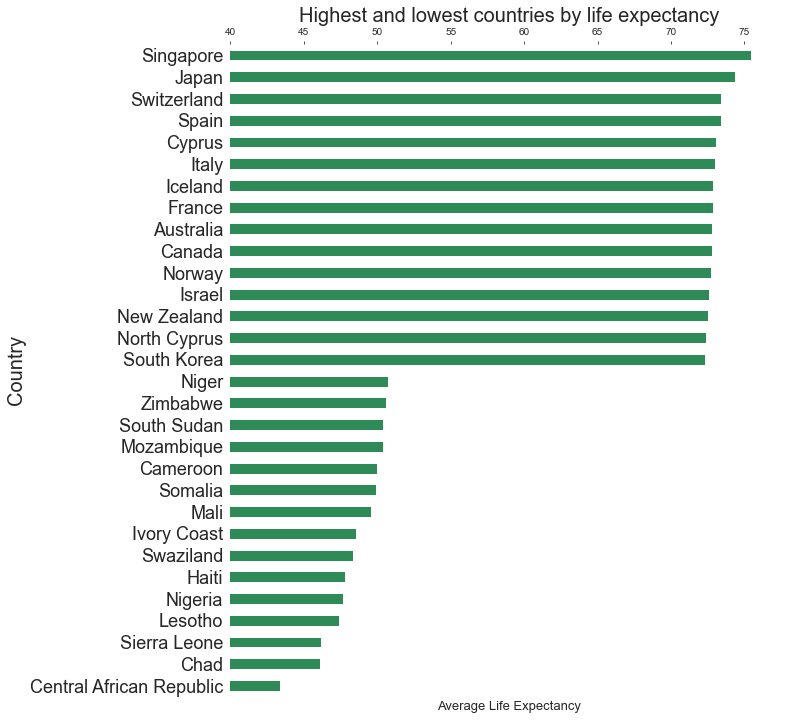

In [169]:
# Life expectancy by country
ax = life_expectancy_list.sort_values(ascending=True).plot(kind="barh", xlim=(40,78), figsize=(10,12), color="seagreen" )
plt.xlabel("Average Life Expectancy", size=13)
plt.xticks(size=18)
plt.ylabel("Country", size=20)
plt.yticks(size=18)
plt.title("Highest and lowest countries by life expectancy", size=20)

for location in ["left", "right", "top", "bottom"]:
    ax.spines[location].set_visible(False)

ax.xaxis.tick_top()

